In [3]:
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install matplotlib
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
print("check")

check


In [4]:
train=pd.read_csv(r"C:\Users\trive\train.csv")
train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test=pd.read_csv(r"C:\Users\trive\test.csv")
test.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool,
 id              False
 comment_text    False
 dtype: bool)

In [7]:
category=["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
y=train[category].values

sentences_train=train["comment_text"]
sentences_train.head()
sentences_test=test["comment_text"]
sentences_test.head()

0    Yo bitch Ja Rule is more succesful then you'll...
1    == From RfC == \n\n The title is fine as it is...
2    " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3    :If you have a look back at the source, the in...
4            I don't anonymously edit articles at all.
Name: comment_text, dtype: object

In [9]:
maximum=20000
token=Tokenizer(num_words=maximum)
token.fit_on_texts(list(sentences_train))
list_tokenized_train = token.texts_to_sequences(sentences_train)
list_tokenized_test = token.texts_to_sequences(sentences_test)

In [10]:
list_tokenized_train[:1]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985]]

In [11]:
maxlen=200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
#padding sequence so that size is not very big and not very small


In [133]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]


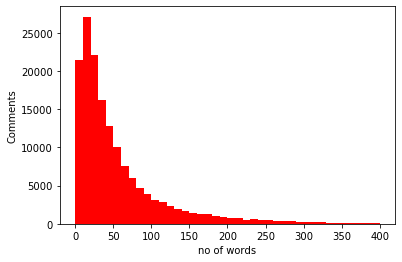

In [13]:
plt.hist(totalNumWords,bins = np.arange(0,410,10),color="red")#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel('no of words')
plt.ylabel('Comments')

plt.show()

In [14]:
inp=Input(shape=(maxlen,))

In [19]:
embed_size = 128
x = Embedding(maximum, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
print(x)

Tensor("global_max_pooling1d_2/Max:0", shape=(?, 60), dtype=float32)


In [20]:
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x) # this is for binary classification for all 6 category



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [54]:
batch_size = 32
epochs = 2
history=model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 684s 5ms/step - loss: 0.0378 - acc: 0.9853 - val_loss: 0.0454 - val_acc: 0.9832
Epoch 2/2
143613/143613 [==============================] - 875s 6ms/step - loss: 0.0326 - acc: 0.9870 - val_loss: 0.0490 - val_acc: 0.9827


In [106]:
score=model.evaluate(X_t,y ,verbose=1)

159571/159571 [==============================] - 138s 862us/step


In [115]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))

acc: 98.93%
loss: 2.81%


In [ ]:
THE BELOW CODE IS TO SAVE THE MODEL

In [123]:
model_json = model.to_json()
with open("mymodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mymodel.h5")
print("Saved model to disk")

Saved model to disk


In [125]:
model.save("model.h5")

In [ ]:
from numpy import loadtxt
from keras.models import load_model
model=load_model('model.h5')
model.summary()
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))

In [99]:
predictions=model.predict(X_te, batch_size = 32, verbose = 1)



153164/153164 [==============================] - 113s 736us/step
First prediction: [0.99943024 0.44516963 0.9947281  0.04020742 0.9622603  0.11236677]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


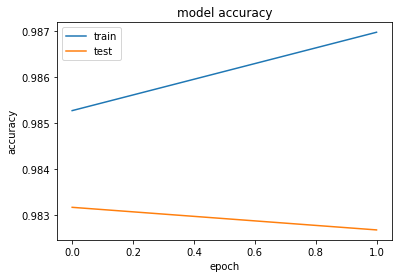

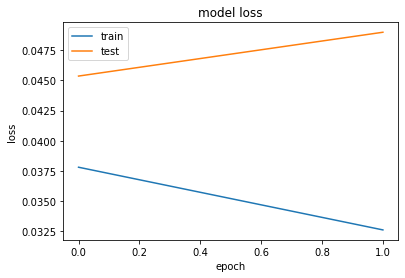

In [89]:
#print(history.history.keys())
results=history.history.keys()
print(results)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
print(prediction)

[[9.99430239e-01 4.45169628e-01 9.94728088e-01 4.02074158e-02
  9.62260306e-01 1.12366766e-01]
 [2.58058310e-04 0.00000000e+00 7.03334808e-06 1.78813934e-07
  1.05500221e-05 1.02519989e-05]
 [7.14749098e-04 6.79492950e-06 3.57836485e-04 1.05500221e-05
  1.13248825e-04 8.11219215e-05]
 ...
 [8.97049904e-06 0.00000000e+00 1.04308128e-06 0.00000000e+00
  2.98023224e-07 2.08616257e-07]
 [2.78651714e-05 0.00000000e+00 5.06639481e-07 5.96046448e-08
  8.34465027e-07 9.53674316e-06]
 [9.89491522e-01 1.47377849e-02 8.55288684e-01 5.99473715e-04
  7.28984594e-01 2.90581584e-03]]


In [132]:
batch_size = 128
epochs = 20
history1=model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.25)

Train on 119678 samples, validate on 39893 samples
Epoch 1/20
119678/119678 [==============================] - 453s 4ms/step - loss: 0.0253 - acc: 0.9901 - val_loss: 0.0365 - val_acc: 0.9869
Epoch 2/20
119678/119678 [==============================] - 459s 4ms/step - loss: 0.0217 - acc: 0.9915 - val_loss: 0.0393 - val_acc: 0.9865
Epoch 3/20
119678/119678 [==============================] - 493s 4ms/step - loss: 0.0187 - acc: 0.9928 - val_loss: 0.0419 - val_acc: 0.9860
Epoch 4/20
119678/119678 [==============================] - 414s 3ms/step - loss: 0.0161 - acc: 0.9939 - val_loss: 0.0480 - val_acc: 0.9850
Epoch 5/20
119678/119678 [==============================] - 423s 4ms/step - loss: 0.0134 - acc: 0.9950 - val_loss: 0.0529 - val_acc: 0.9849
Epoch 6/20
119678/119678 [==============================] - 423s 4ms/step - loss: 0.0113 - acc: 0.9957 - val_loss: 0.0579 - val_acc: 0.9844
Epoch 7/20
119678/119678 [==============================] - 427s 4ms/step - loss: 0.0097 - acc: 0.9964 - val_

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


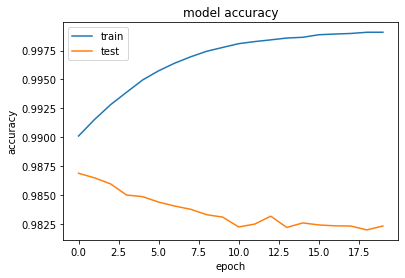

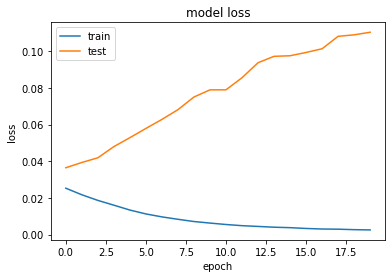

In [135]:
#print(history.history.keys())
results=history.history.keys()
print(results)

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()